## Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/JKU/Courses/MLPC_UE/A3')
!ls

Mounted at /content/drive
 Assignment3_Naive_Bayes.ipynb		   mount.ipynb
 Assignment3_step2_hyperparameters.ipynb   pca.pkl
 Assignment3_SVM.ipynb			   scene_analysis
 CNN-Classifier.ipynb			   scene_analysis.zip
 figures				   SVM_hyperparameters_tuning_output_grid_search.txt
'MLPC 2024 Task 3 Classification.pdf'


In [ ]:
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
features = np.load('../development.npy')
metadata = pd.read_csv('../modified_development.csv')
feature_names = pd.read_csv('../metadata/idx_to_feature_name.csv')
# labels = metadata['label']

# Showing the first few rows to verify the labels have been added correctly
print(metadata.head())

features.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   id                 filename  speaker_id         word               label
0   0     words/Brötchen/1.wav           1     Brötchen   Non-command Words
1   1         words/kann/1.wav           1         kann   Sound-alike Words
2   2  words/Staubsauger/1.wav           1  Staubsauger  Smart Home Devices
3   3      words/Spiegel/1.wav           1      Spiegel   Non-command Words
4   4        words/Alarm/1.wav           1        Alarm  Smart Home Devices


(45296, 175, 44)

## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Defined classes and one additional class for 'other'
classes = ["Fernseher", "Heizung", "Licht", "Lüftung", "Ofen", "Alarm", "Radio", "Staubsauger", "an", "aus", "other"]

# Map all non-specified labels to 'other'
metadata['encoded_label'] = metadata['word'].apply(lambda x: x if x in classes else 'other')
print(metadata.head())

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder to your classes including 'other'
label_encoder.fit(classes)

# Transform labels to integers
metadata['encoded_label'] = label_encoder.transform(metadata['encoded_label'])

# Check the encoded labels
print(metadata[['word', 'encoded_label']])


   id                 filename  speaker_id         word               label  \
0   0     words/Brötchen/1.wav           1     Brötchen   Non-command Words   
1   1         words/kann/1.wav           1         kann   Sound-alike Words   
2   2  words/Staubsauger/1.wav           1  Staubsauger  Smart Home Devices   
3   3      words/Spiegel/1.wav           1      Spiegel   Non-command Words   
4   4        words/Alarm/1.wav           1        Alarm  Smart Home Devices   

  encoded_label  
0         other  
1         other  
2   Staubsauger  
3         other  
4         Alarm  
              word  encoded_label
0         Brötchen             10
1             kann             10
2      Staubsauger              7
3          Spiegel             10
4            Alarm              0
...            ...            ...
45291        other             10
45292        other             10
45293        other             10
45294        other             10
45295        other             10

[45296 r

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
feature_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

,index,feature_name
0,0,bandwidth_0
1,1,centroid_0
2,2,contrast_0
3,3,contrast_1
4,4,contrast_2
...,...,...
170,170,mfcc_d2_30
171,171,mfcc_d2_31
172,172,power_0
173,173,yin_0


## Shuffle the Data

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# # Generate shuffled indices
shuffled_indices = np.random.permutation(len(features))

# # Apply shuffled indices to both features and metadata
features = features[shuffled_indices]
metadata = metadata.iloc[shuffled_indices].reset_index(drop=True)
print(metadata.head())

# Extract labels
labels = metadata['encoded_label'].values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      id                             filename  speaker_id     word  \
0  20756                 words/Licht/1523.wav          89    Licht   
1  24442               words/Leitung/1818.wav         185  Leitung   
2  41555  words/other/1925_23_speech_true.wav          22    other   
3   7173                words/Spiegel/550.wav         140  Spiegel   
4  26705                 words/offen/1986.wav          36    offen   

                label  encoded_label  
0  Smart Home Devices              3  
1   Sound-alike Words             10  
2        Other Sounds             10  
3   Non-command Words             10  
4   Sound-alike Words             10  


## Identify highly correlated features and remove them

In [ ]:
# Number of samples, features, and frames
num_samples, num_features, num_frames =features.shape

# Calculate the mean correlation coefficients across time frames
mean_correlations = np.zeros((num_features, num_features))  # Placeholder for mean correlations

for i in range(num_features):
    for j in range(i+1, num_features):
        temp_corr = [np.corrcoef(features[:, i, t], features[:, j, t])[0, 1] for t in range(num_frames)]
        mean_correlations[i, j] = mean_correlations[j, i] = np.mean(temp_corr)

# Convert to DataFrame for easier manipulation
corr_matrix = pd.DataFrame(mean_correlations)

# Set the threshold
threshold = 0.8

# Find indices where correlation is high
high_corr = np.where((corr_matrix > threshold) & (corr_matrix != 1.0))

# Extract pairs
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x < y]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
high_corr_pairs
# corr_matrix.shape
# mean_correlations.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1),
 (1, 174),
 (12, 13),
 (13, 14),
 (13, 15),
 (13, 16),
 (13, 17),
 (13, 18),
 (13, 19),
 (14, 15),
 (14, 16),
 (14, 17),
 (14, 18),
 (14, 19),
 (14, 20),
 (15, 16),
 (15, 17),
 (15, 18),
 (15, 19),
 (15, 20),
 (15, 21),
 (16, 17),
 (16, 18),
 (16, 19),
 (16, 20),
 (16, 21),
 (17, 18),
 (17, 19),
 (17, 20),
 (17, 21),
 (17, 22),
 (17, 23),
 (18, 19),
 (18, 20),
 (18, 21),
 (18, 22),
 (18, 23),
 (18, 24),
 (19, 20),
 (19, 21),
 (19, 22),
 (19, 23),
 (19, 24),
 (19, 25),
 (19, 26),
 (19, 76),
 (20, 21),
 (20, 22),
 (20, 23),
 (20, 24),
 (20, 25),
 (20, 26),
 (20, 27),
 (20, 28),
 (20, 76),
 (21, 22),
 (21, 23),
 (21, 24),
 (21, 25),
 (21, 26),
 (21, 27),
 (21, 28),
 (21, 29),
 (21, 30),
 (21, 31),
 (21, 76),
 (22, 23),
 (22, 24),
 (22, 25),
 (22, 26),
 (22, 27),
 (22, 28),
 (22, 29),
 (22, 30),
 (22, 31),
 (22, 32),
 (22, 33),
 (22, 76),
 (23, 24),
 (23, 25),
 (23, 26),
 (23, 27),
 (23, 28),
 (23, 29),
 (23, 30),
 (23, 31),
 (23, 32),
 (23, 33),
 (23, 34),
 (23, 35),
 (23, 76),
 

In [ ]:
# Flatten the list of pairs and count frequency
from collections import Counter
all_features = [item for sublist in high_corr_pairs for item in sublist]
count = Counter(all_features)

# Remove features that appear most frequently
to_remove = {item for item, freq in count.items() if freq > 1}

# New list without highly correlated features
remaining_features = [col for col in corr_matrix.columns if col not in to_remove]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
remaining_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174]

In [ ]:
# Assuming the original feature set is in a DataFrame or similar structure
filtered_features = features[:, remaining_features, :]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# filtered_features.shape
filtered_feature_names = feature_names.loc[remaining_features, 'feature_name'].tolist()
filtered_feature_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['bandwidth_0',
 'contrast_0',
 'contrast_1',
 'contrast_2',
 'contrast_3',
 'contrast_4',
 'contrast_5',
 'contrast_6',
 'energy_0',
 'flatness_0',
 'flux_0',
 'melspect_0',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'mfcc_21',
 'mfcc_22',
 'mfcc_23',
 'mfcc_24',
 'mfcc_25',
 'mfcc_26',
 'mfcc_27',
 'mfcc_28',
 'mfcc_29',
 'mfcc_30',
 'mfcc_31',
 'mfcc_d_0',
 'mfcc_d_1',
 'mfcc_d_2',
 'mfcc_d_3',
 'mfcc_d_4',
 'mfcc_d_5',
 'mfcc_d_6',
 'mfcc_d_7',
 'mfcc_d_8',
 'mfcc_d_9',
 'mfcc_d_10',
 'mfcc_d_11',
 'mfcc_d_12',
 'mfcc_d_13',
 'mfcc_d_14',
 'mfcc_d_15',
 'mfcc_d_16',
 'mfcc_d_17',
 'mfcc_d_18',
 'mfcc_d_19',
 'mfcc_d_20',
 'mfcc_d_21',
 'mfcc_d_22',
 'mfcc_d_23',
 'mfcc_d_24',
 'mfcc_d_25',
 'mfcc_d_26',
 'mfcc_d_27',
 'mfcc_d_28',
 'mfcc_d_29',
 'mfcc_d_30',
 'mfcc_d_31',
 'mfcc_d2_0',
 'mfcc_d2_

## Filtering Most Important Features

In [ ]:
feature_name_to_index = dict(zip(feature_names['feature_name'], feature_names['index']))
important_features = [
    'mfcc_3', 'power_0', 'mfcc_4', 'zcr_0', 'mfcc_1',
    'mfcc_d_0', 'energy_0', 'centroid_0', 'flux_0', 'mean_contrast','contrast_0', 'contrast_1', 'contrast_2', 'contrast_3',
    'contrast_4', 'contrast_5', 'contrast_6'
]

important_indices = [feature_name_to_index[feat] for feat in important_features if feat in feature_name_to_index]
imp_features = features[:, important_indices, :]

# # List of contrast features
# contrast_features = [
#     'contrast_0', 'contrast_1', 'contrast_2', 'contrast_3',
#     'contrast_4', 'contrast_5', 'contrast_6'
# ]
# Get indices of the contrast features
# contrast_indices = [feature_name_to_index[feat] for feat in contrast_features if feat in feature_name_to_index]

# contrast_data = features[:, contrast_indices, :]
# Calculate the mean across the contrast feature axis
# mean_contrast = np.mean(contrast_data, axis=1)

# mean_contrast = mean_contrast[:, np.newaxis, :]  # Add a new axis if needed for consistency

# Combine important features with mean contrast
# Check dimensions and concatenate along the feature axis (axis=1)
# if mean_contrast.shape[-1] == imp_features.shape[-1]:
#     combined_imp_features = np.concatenate((imp_features, mean_contrast), axis=1)
# else:
#     print("Error: Dimension mismatch.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
important_feature_names = feature_names.loc[important_indices, 'feature_name'].tolist()
important_feature_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['mfcc_3',
 'power_0',
 'mfcc_4',
 'zcr_0',
 'mfcc_1',
 'mfcc_d_0',
 'energy_0',
 'centroid_0',
 'flux_0',
 'contrast_0',
 'contrast_1',
 'contrast_2',
 'contrast_3',
 'contrast_4',
 'contrast_5',
 'contrast_6']

## Reshape and Split the Feature Data

In [ ]:
# Reshape features to collapse the time frames into feature statistics (mean here as example)
features_imp_2d = np.mean(imp_features, axis=2)  # Now features_imp_2d has shape (45000, 10)
features_imp_2d.shape

features_filtered_2d = np.mean(filtered_features, axis=2)
features_filtered_2d.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(45296, 110)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_filtered_2d, labels, test_size=0.2, random_state=42)

# Optional: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Initialize Gaussian Naive Bayes
modelG = GaussianNB()

# Train the model
modelG.fit(X_train, y_train)


GaussianNB()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.model_selection import cross_val_score
classifiers = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB()
}


In [ ]:
# Assuming X_train and X_test are your feature sets
min_value = min(X_train.min(), X_test.min())  # Find the minimum value across both sets
shift = 0 if min_value >= 0 else -min_value  # Calculate how much to shift to make all values non-negative

X_train_shifted = X_train + shift
X_test_shifted = X_test + shift

# Now, X_train_shifted and X_test_shifted contain only non-negative values and can be used with MultinomialNB.


In [ ]:
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_shifted, y_train, cv=5, scoring='f1_macro')
    results[name] = scores
    print(f"{name} Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores) * 2:.4f})")


GaussianNB Accuracy: 0.2840 (+/- 0.0065)
MultinomialNB Accuracy: 0.0644 (+/- 0.0000)
BernoulliNB Accuracy: 0.0644 (+/- 0.0000)
ComplementNB Accuracy: 0.2488 (+/- 0.0086)


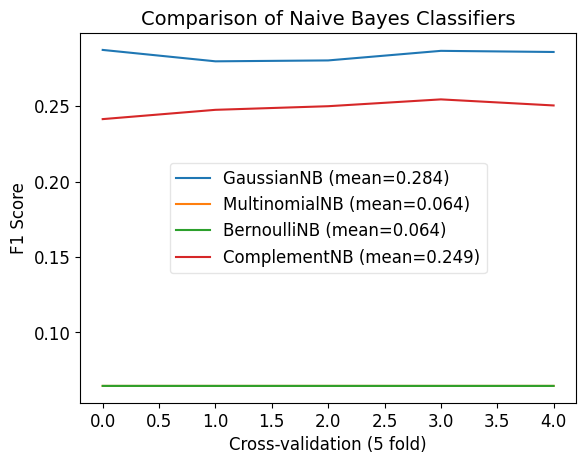

In [ ]:
# Plotting the results
fig, ax = plt.subplots()
for name, scores in results.items():
    ax.plot(scores, label=f"{name} (mean={np.mean(scores):.3f})")
ax.set_ylabel('F1 Score')
ax.set_xlabel('Cross-validation (5 fold)')
ax.set_title('Comparison of Naive Bayes Classifiers')
ax.legend(loc='center', framealpha=0.5)  # Set transparency to 50%
plt.savefig("figures/Comparison_of_Naive_Bayes_Classifiers_Across_Various_Metrics_F1.pdf", format="pdf", bbox_inches="tight")
plt.show()


GaussianNB - Accuracy: 0.2970 (+/- 0.0087)
GaussianNB - F1 Score (Micro): 0.2970 (+/- 0.0087)
MultinomialNB - Accuracy: 0.5488 (+/- 0.0001)
MultinomialNB - F1 Score (Micro): 0.5488 (+/- 0.0001)
BernoulliNB - Accuracy: 0.5489 (+/- 0.0000)
BernoulliNB - F1 Score (Micro): 0.5489 (+/- 0.0000)
ComplementNB - Accuracy: 0.3857 (+/- 0.0047)
ComplementNB - F1 Score (Micro): 0.3857 (+/- 0.0047)


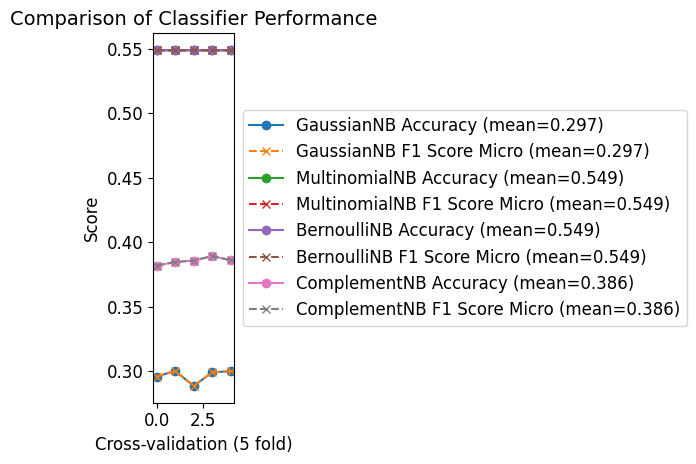

In [ ]:
from sklearn.model_selection import cross_validate

results = {}
for name, clf in classifiers.items():
    # Compute both accuracy and F1 score (micro) during cross-validation
    scores = cross_validate(clf, X_train_shifted, y_train, cv=5, scoring=['accuracy', 'f1_micro'])
    results[name] = scores
    print(f"{name} - Accuracy: {np.mean(scores['test_accuracy']):.4f} (+/- {np.std(scores['test_accuracy']) * 2:.4f})")
    print(f"{name} - F1 Score (Micro): {np.mean(scores['test_f1_micro']):.4f} (+/- {np.std(scores['test_f1_micro']) * 2:.4f})")
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for name, scores in results.items():
    # Plotting accuracy
    ax.plot(scores['test_accuracy'], label=f"{name} Accuracy (mean={np.mean(scores['test_accuracy']):.3f})", marker='o', linestyle='-')
    # Plotting F1 score
    ax.plot(scores['test_f1_micro'], label=f"{name} F1 Score Micro (mean={np.mean(scores['test_f1_micro']):.3f})", marker='x', linestyle='--')

ax.set_ylabel('Score')
ax.set_xlabel('Cross-validation (5 fold)')
ax.set_title('Comparison of Classifier Performance')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend outside of the plot
plt.tight_layout()
plt.savefig("figures/Classifier_Performance_Comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()


Results for GaussianNB:
accuracy: 0.2970 ± 0.0044
precision: 0.4779 ± 0.0076
recall: 0.2970 ± 0.0044
f1_score: 0.2966 ± 0.0061
Results for MultinomialNB:
accuracy: 0.5488 ± 0.0001
precision: 0.3013 ± 0.0000
recall: 0.5488 ± 0.0001
f1_score: 0.3890 ± 0.0000
Results for BernoulliNB:
accuracy: 0.5489 ± 0.0000
precision: 0.3013 ± 0.0000
recall: 0.5489 ± 0.0000
f1_score: 0.3891 ± 0.0000
Results for ComplementNB:
accuracy: 0.3857 ± 0.0024
precision: 0.4429 ± 0.0080
recall: 0.3857 ± 0.0024
f1_score: 0.3891 ± 0.0017


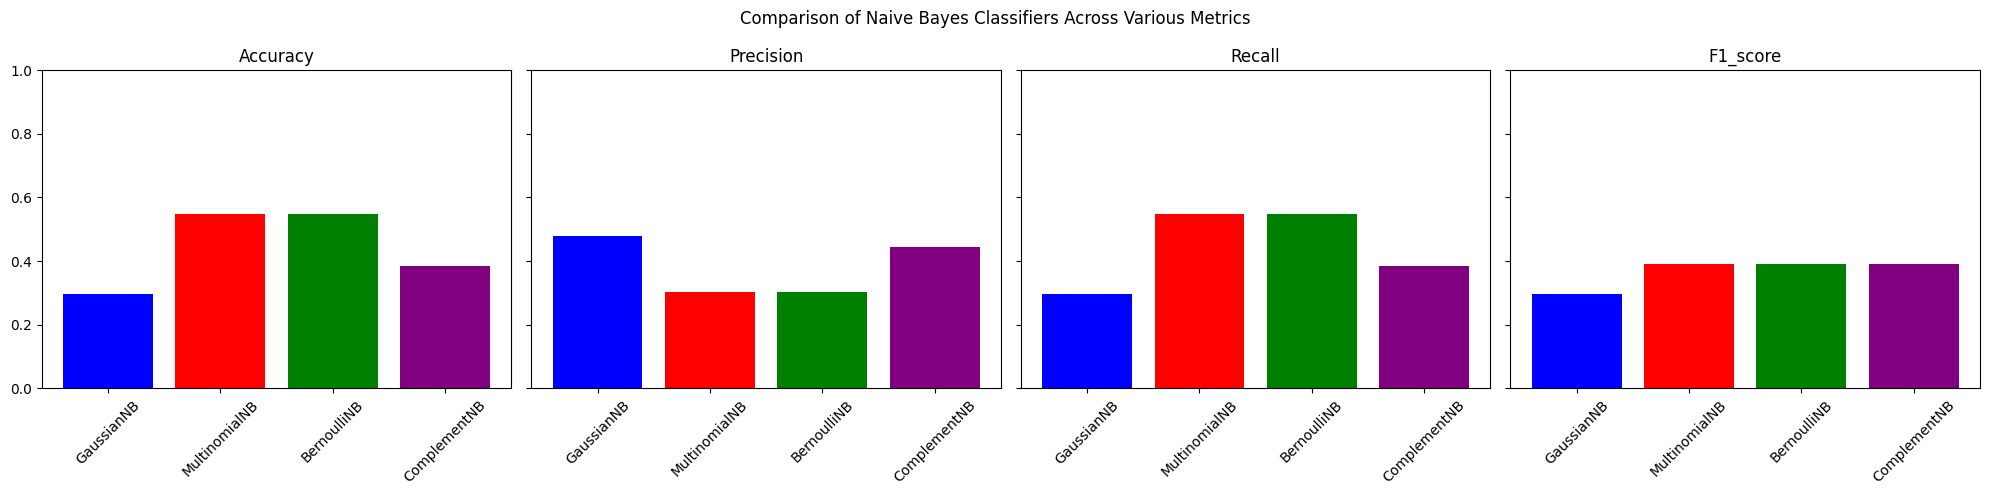

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}
results = {}
for name, model in classifiers.items():
    result = cross_validate(model, X_train_shifted, y_train, cv=5, scoring=scoring)
    results[name] = result
    print(f"Results for {name}:")
    for key, value in result.items():
        if 'test_' in key:
            print(f"{key.split('test_')[1]}: {np.mean(value):.4f} ± {np.std(value):.4f}")
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(20, 5), sharey=True)

for ax, metric in zip(axes, metrics):
    values = [np.mean(results[name]['test_' + metric]) for name in classifiers.keys()]
    ax.bar(classifiers.keys(), values, color=['blue', 'red', 'green', 'purple'])
    ax.set_title(metric.capitalize())
    ax.set_ylim(0, 1)  # Assuming metric scores are normalized between 0 and 1
    ax.set_xticklabels(classifiers.keys(), rotation=45)

fig.suptitle('Comparison of Naive Bayes Classifiers Across Various Metrics')
plt.tight_layout()
plt.savefig("figures/Comparison_of_Naive_Bayes_Classifiers_Across_Various_Metrics.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Making predictions
y_pred = modelG.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1 = f1_score(y_test, y_pred, average='macro')

print("Test Set Evaluation:")
print("Precision: %0.2f" % test_precision)
print("Recall: %0.2f" % test_recall)
print("F1 Score: %0.2f" % test_f1)



Accuracy: 29.56%
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.37      0.33       424
           1       0.21      0.37      0.27       410
           2       0.19      0.13      0.16       415
           3       0.22      0.71      0.33       389
           4       0.27      0.22      0.25       399
           5       0.23      0.22      0.22       380
           6       0.21      0.25      0.23       425
           7       0.28      0.63      0.38       429
           8       0.14      0.66      0.23       393
           9       0.30      0.53      0.39       410
          10       0.67      0.20      0.31      4986

    accuracy                           0.30      9060
   macro avg       0.27      0.39      0.28      9060
weighted avg       0.47      0.30      0.30      9060

Test Set Evaluation:
Precision: 0.27
Recall: 0.39
F1 Score: 0.28


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42) #dt classifier initialization


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Decision Tree parameter grid
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', verbose=3)
dt_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.439 total time=   9.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.451 total time=   7.3s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.443 total time=   8.8s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.445 total time=   7.3s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.458 total time=   8.7s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.443 total time=   7.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.447 total time=   8.5s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.451 total time=   7.9s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.447 total time=   8.1s
[CV 5/5] END max

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=3)

In [ ]:

print("Best parameters:", dt_grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(dt_grid_search.best_score_))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score: 0.55


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results = dt_grid_search.cv_results_

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Filter columns and expand the params column into separate columns
params_df = results_df.loc[:, ['mean_test_score', 'params']].copy()
params_df = pd.concat([params_df.drop(['params'], axis=1), params_df['params'].apply(pd.Series)], axis=1)
params_df.head()



,mean_test_score,max_depth,min_samples_leaf,min_samples_split
0,0.447539,NaN,1.0,2.0
1,0.450188,NaN,1.0,10.0
2,0.458522,NaN,1.0,20.0
3,0.468015,NaN,5.0,2.0
4,0.468015,NaN,5.0,10.0


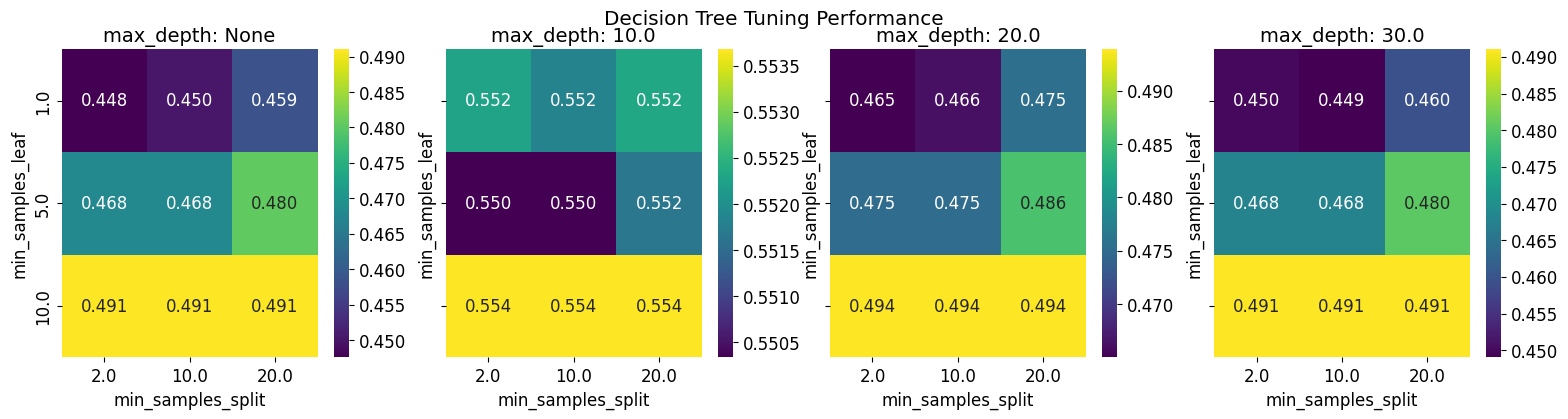

In [ ]:
params_df['max_depth'] = params_df['max_depth'].fillna('None')  # Uncomment if not done above


# Unique depth
max_depth = params_df['max_depth'].unique()
# max_depth

import matplotlib.pyplot as plt
import seaborn as sns

# Setup plot
matplotlib.rcParams.update({'font.size': 12, 'axes.titlesize': 14})

fig, axes = plt.subplots(1, len(max_depth), figsize=(19, 4), sharey=True)
fig.suptitle('Decision Tree Tuning Performance')

# Plot each kernel's performance as a heatmap
for ax, max_depth in zip(axes, max_depth):
    # Filter data for the max_depthl
    max_depth_data = params_df[params_df['max_depth'] == max_depth]
    pivot = max_depth_data.pivot(index='min_samples_leaf', columns='min_samples_split', values='mean_test_score')
    sns.heatmap(pivot, annot=True, fmt=".3f", ax=ax, cmap='viridis')
    ax.set_title(f'max_depth: {max_depth}')
    ax.set_xlabel('min_samples_split')
    ax.set_ylabel('min_samples_leaf')
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
plt.savefig("figures/DT_Hyperparameter_Tuning_Performance_full_set_accuracy.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
dt_model_final = DecisionTreeClassifier(**dt_grid_search.best_params_,random_state=42) #dt classifier initialization

dt_model_final.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

In [ ]:
# Making predictions
y_pred = dt_model_final.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1 = f1_score(y_test, y_pred, average='macro')

print("Test Set Evaluation:")
print("Precision: %0.2f" % test_precision)
print("Recall: %0.2f" % test_recall)
print("F1 Score: %0.2f" % test_f1)

Accuracy: 55.60%
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.19      0.27       424
           1       0.40      0.15      0.22       410
           2       0.22      0.10      0.13       415
           3       0.39      0.25      0.30       389
           4       0.26      0.07      0.11       399
           5       0.37      0.11      0.17       380
           6       0.21      0.01      0.03       425
           7       0.63      0.43      0.51       429
           8       0.50      0.05      0.09       393
           9       0.45      0.29      0.36       410
          10       0.58      0.87      0.70      4986

    accuracy                           0.56      9060
   macro avg       0.41      0.23      0.26      9060
weighted avg       0.50      0.56      0.48      9060

Test Set Evaluation:
Precision: 0.41
Recall: 0.23
F1 Score: 0.26


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.07      0.12       424
           1       0.97      0.16      0.27       410
           2       1.00      0.00      0.00       415
           3       0.83      0.09      0.16       389
           4       1.00      0.01      0.02       399
           5       0.60      0.02      0.05       380
           6       0.50      0.00      0.01       425
           7       0.94      0.44      0.60       429
           8       0.00      0.00      0.00       393
           9       0.70      0.09      0.16       410
          10       0.57      0.99      0.73      4986

    accuracy                           0.59      9060
   macro avg       0.72      0.17      0.19      9060
weighted avg       0.65      0.59      0.46      9060

Accuracy: 0.5867549668874172


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.564 total time=  32.9s
[CV 2/5] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.564 total time=  32.9s
[CV 3/5] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.564 total time=  32.4s
[CV 4/5] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.564 total time=  32.3s
[CV 5/5] END max_depth=10, min_samples_split=2, n_estimators=100;, score=0.564 total time=  32.4s
[CV 1/5] END max_depth=10, min_samples_split=2, n_estimators=200;, score=0.564 total time= 1.1min
[CV 2/5] END max_depth=10, min_samples_split=2, n_estimators=200;, score=0.563 total time= 1.1min
[CV 3/5] END max_depth=10, min_samples_split=2, n_estimators=200;, score=0.563 total time= 1.1min
[CV 4/5] END max_depth=10, min_samples_split=2, n_estimators=200;, score=0.564 total time= 1.1min
[CV 5/5] END max_depth=10, min_samples_split=2, n_estima

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.58


In [ ]:
results = grid_search.cv_results_

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Filter columns and expand the params column into separate columns
params_df = results_df.loc[:, ['mean_test_score', 'params']].copy()
params_df = pd.concat([params_df.drop(['params'], axis=1), params_df['params'].apply(pd.Series)], axis=1)
params_df.head()

,mean_test_score,max_depth,min_samples_split,n_estimators
0,0.563997,10.0,2.0,100.0
1,0.563942,10.0,2.0,200.0
2,0.563997,10.0,2.0,300.0
3,0.564108,10.0,5.0,100.0
4,0.563721,10.0,5.0,200.0


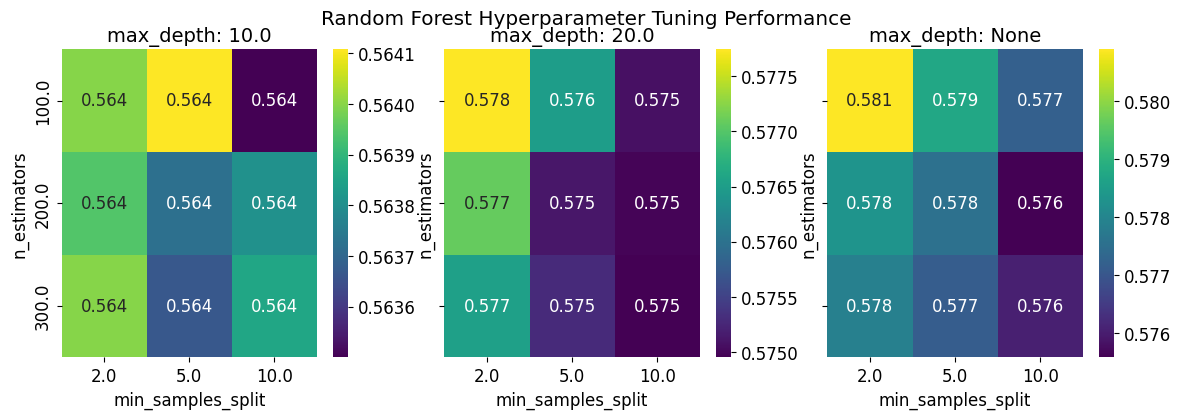

In [ ]:
params_df['max_depth'] = params_df['max_depth'].fillna('None')  # Uncomment if not done above


# Unique depth
max_depth = params_df['max_depth'].unique()
# max_depth
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams.update({'font.size': 12, 'axes.titlesize': 14})
# Setup plot
fig, axes = plt.subplots(1, len(max_depth), figsize=(14, 4), sharey=True)
fig.suptitle('Random Forest Hyperparameter Tuning Performance')

# Plot each kernel's performance as a heatmap
for ax, max_depth in zip(axes, max_depth):
    # Filter data for the max_depthl
    max_depth_data = params_df[params_df['max_depth'] == max_depth]
    pivot = max_depth_data.pivot(index='n_estimators', columns='min_samples_split', values='mean_test_score')
    sns.heatmap(pivot, annot=True, fmt=".3f", ax=ax, cmap='viridis')
    ax.set_title(f'max_depth: {max_depth}')
    ax.set_xlabel('min_samples_split')
    ax.set_ylabel('n_estimators')
    # Increase label size for better readability
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
plt.savefig("figures/RF_Hyperparameter_Tuning_Performance_full_set_accuracy.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
rf_model_final = RandomForestClassifier(**grid_search.best_params_,random_state=42) #dt classifier initialization

rf_model_final.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the testing set
y_pred = rf_model_final.predict(X_test)

# Evaluate the model
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1 = f1_score(y_test, y_pred, average='macro')

print("Test Set Evaluation:")
print("Precision: %0.2f" % test_precision)
print("Recall: %0.2f" % test_recall)
print("F1 Score: %0.2f" % test_f1)

Accuracy: 58.68%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.07      0.12       424
           1       0.97      0.16      0.27       410
           2       1.00      0.00      0.00       415
           3       0.83      0.09      0.16       389
           4       1.00      0.01      0.02       399
           5       0.60      0.02      0.05       380
           6       0.50      0.00      0.01       425
           7       0.94      0.44      0.60       429
           8       0.00      0.00      0.00       393
           9       0.70      0.09      0.16       410
          10       0.57      0.99      0.73      4986

    accuracy                           0.59      9060
   macro avg       0.72      0.17      0.19      9060
weighted avg       0.65      0.59      0.46      9060

Test Set Evaluation:
Precision: 0.72
Recall: 0.17
F1 Score: 0.19


In [ ]:

results = pd.DataFrame(grid_search.cv_results_)
fig, ax = plt.subplots(figsize=(8, 6))
results['mean_test_score'].plot(ax=ax)
ax.set_title('Model Performance Over Different Parameter Combinations')
ax.set_xlabel('Parameter Combination Index')
ax.set_ylabel('Mean Test Score (Accuracy)')
plt.show()


In [ ]:
accuracy = rf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2%}")


In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices, rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()
